##Andmete anal√º√ºs

Viimases osas toimub eelnevalt kogutud andmete anal√º√ºs.

In [56]:
import json
from collections import Counter
from collections import defaultdict
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

In [33]:
puhas_jarjend =[] #loeme sisse andmed
with open('andmed_tabelisse.json') as f:
    for line in f:        
        uus_rida = json.loads(line)  
        puhas_jarjend.append(uus_rida)

In [31]:
puhas_jarjend2 =[] #loeme sisse andmed
with open('loplikult_puhastatud3.json') as f:
    for line in f:        
        uus_rida = json.loads(line)  
        puhas_jarjend2.append(uus_rida)

In [34]:
for rida in puhas_jarjend[:5]: #testime andmeid
    print(rida) 

[1, 2013, '80353', '378813', 1, 0, 1, 0, 0, 0, -1, -1.5, 'Traditsioonilised', 0, 0, -0.0234375, 64, 4, ' 16', 'Thursday', '√ïhtu', 3, 382]
[2, 2012, '12554', '361370', 1, 0, 1, 0, 0, 0, -1, -0.5, 'Traditsioonilised', 0, 0, -0.0023584905660377358, 212, 19, ' 16', 'Tuesday', '√ïhtu', 9, 1490]
[3, 2016, '2341221', '372159', 1, 0, 1, 0, 0, 0, -1, 2.5, 'Traditsioonilised', 1, 0, 0.018796992481203006, 133, 19, ' 22', 'Thursday', '√ïhtu', 8, 816]
[4, 2012, '41359', '372464', 0, 1, 1, 0, 0, 0, -1, -0.5, 'Traditsioonilised', 0, 0, -0.008333333333333333, 60, 14, ' 09', 'Saturday', 'P√§ev', 4, 389]
[5, 2013, '60866', '364383', 0, 0, 0, 1, 0, 1, 1, 0.5, 'Autonoomsed', 0, 0, 0.005208333333333333, 96, 15, ' 15', 'Tuesday', 'P√§ev', 5, 631]


In [5]:
for rida in puhas_jarjend2[:3]: #testime andmeid
    print(rida)

[1, '80353', 'Teismeliste k√§itumine.', '378813', '29.08.2013 16:56', 'Minu esimene m√µte oli ka, et kas see teismeline ikka √ºldse m√§rkas sind? Ma olen ise seda t√º√ºpi, kes avalikes ja rahvarikastes kohtades on nii oma mullis, et kui just otsa ei k√µnni, siis v√µin klaasistunud pilgul ka v√§ga heast ja kallist tuttavast 20 cm kauguselt m√∂√∂da k√µndida ja teda mitte m√§rgata. Ja nii j√§√§bki tere √ºtlemata ning viisakuse puudumisega pole asjal mingit pistmist. ']
[2, '12554', 'Kuidas karistada kui 2kl. laps ei pane √µppimisi kirja?', '361370', '13.03.2012 16:46', 'meile tegi √µpetaja selgeks, et j√§rgmise p√§eva √µppimise √ºlesanded on lapsel kohustus kirjutada p√§evikusse, tema e-kooli ei kirjuta detailselt j√§rgmise p√§eva √µppimist ja m√µned asjad v√µivad ilmuda tagantj√§rele. Esmalt peaksin mina lapsega maha t√µsise vestluse, kus ta peaks ise anal√º√ºsima olukroda, siis las kirjeldab, mida ta tahab/ mis on tema jaoks oluline( sain aru, et hinded ei j√§ta teda √ºksk√µikseks, seal

In [6]:
#saame disainida tabeleid CSS-i kasutades ja luua stiilid
th_props = [ #eksportida selliselt loodud tabeleid on problemaatiline
  ('font-size', '11px'),
  ('text-align', 'left'),
  ('font-weight', 'bold'),
  ('color', 'Maroon'),
  ('background-color', 'ivory')
  ]
td_props = [
  ('font-size', '11px'),
  ('background-color', 'ivory'),
  ('text-align', 'center'),
  ('color', '#4d3300')  
  ]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [37]:
df =pd.DataFrame(puhas_jarjend)#loone dataframe tabeli
df.columns = ['Indeks', 'Aasta','Teema_id', 'Isik_id','Trad_konformsus',
              'Trad_heatahtlik_kohustumine','Traditsioonilised',
              'Autonoomia_looming','Autonoomia_saavutamine','Autonoomia',
              'V√§√§rtused_tulemus', 'Emotsiooniskoor','V√§√§rtusjaotus',
              'Pos_emotikonid', 'Neg_emotikonid','Kaalutud_emotsiooniskoor',
             'S√µnade_arv','Emotsioonis√µnade_arv',
             'Postituse_aeg','N√§dalap√§ev','Postituse_aeg_agr',
             'Lausete_arv','T√§hem√§rkide_arv']
df['Kasvatusv√§√§rtusi'] = df['Traditsioonilised']+df['Autonoomia']
df['S√µnasid_lauses'] = df['S√µnade_arv']/df['Lausete_arv']

In [38]:
df.columns.values.tolist() #saame k√§tte veergude peakirjad

['Indeks',
 'Aasta',
 'Teema_id',
 'Isik_id',
 'Trad_konformsus',
 'Trad_heatahtlik_kohustumine',
 'Traditsioonilised',
 'Autonoomia_looming',
 'Autonoomia_saavutamine',
 'Autonoomia',
 'V√§√§rtused_tulemus',
 'Emotsiooniskoor',
 'V√§√§rtusjaotus',
 'Pos_emotikonid',
 'Neg_emotikonid',
 'Kaalutud_emotsiooniskoor',
 'S√µnade_arv',
 'Emotsioonis√µnade_arv',
 'Postituse_aeg',
 'N√§dalap√§ev',
 'Postituse_aeg_agr',
 'Lausete_arv',
 'T√§hem√§rkide_arv',
 'Kasvatusv√§√§rtusi',
 'S√µnasid_lauses']

In [57]:
#keskmiselt s√µnasid lauses
df.groupby('Aasta')['S√µnasid_lauses'].mean()#.plot(kind='bar')

Aasta
2012    14.381130
2013    14.650987
2014    14.896520
2015    14.782277
2016    14.953418
2017    14.876188
2018    14.786576
Name: S√µnasid_lauses, dtype: float64

In [58]:
#keskmiselt t√§hem√§rke tekstis 
df.groupby('Aasta')['T√§hem√§rkide_arv'].mean()#.plot(kind='bar') 

Aasta
2012     868.952727
2013     906.712312
2014     925.671551
2015    1039.687578
2016    1050.995943
2017     988.292191
2018    1022.773196
Name: T√§hem√§rkide_arv, dtype: float64

In [49]:
#keskmiselt lauseid tekstis
df.groupby('Aasta')['Lausete_arv'].mean()#.plot(kind='bar') 

Aasta
2012     9.410909
2013     9.864322
2014     9.757021
2015    10.856964
2016    11.131846
2017    10.458438
2018    10.612371
Name: Lausete_arv, dtype: float64

In [10]:
#loeme kokku positiivsed ja negatiivsed tujukujud
pos_emotikon_loe = Counter()
neg_emotikon_loe = Counter()
kokku_pos =0
kokku_neg =0
for index,row in df.iterrows():
    if int(row['Pos_emotikonid']) >0:
        pos_emotikon_loe[row['Pos_emotikonid']]+=1
        kokku_pos +=int(row['Pos_emotikonid'])
    if int(row['Neg_emotikonid']) >0:
        neg_emotikon_loe[row['Neg_emotikonid']]+=1
        kokku_neg +=int(row['Neg_emotikonid'])

In [11]:
#liidame andmed √ºheks tabeliks
pos_emo=pd.Series(pos_emotikon_loe).to_frame('Positiivsed emotikonid')
neg_emo= pd.Series(neg_emotikon_loe).to_frame('Negatiivsed emotikonid')
result = pd.concat([pos_emo, neg_emo], axis=1, join='outer')
result.fillna(0,inplace=True)
result= result.astype(int)
result = result.rename_axis('Emotikonide arv tekstis')
result_T2 = result.T
result_T2['Kokku'] = 0 #lisame uue veeru
result_T2.iloc[0,5] =kokku_pos #lisame veergu andmed 
result_T2.iloc[1,5] =kokku_neg
result_T2
result_T2.style.set_table_styles(styles)

In [12]:
#jagame tekstid s√µnade arvust l√§htuvalt kolme v√µrdsesse osasse
df['tekstide_jaotus'] = df['S√µnade_arv'].astype(int)
teksti_pikkus=pd.qcut(df['tekstide_jaotus'],3,labels = ['L√ºhike','Keskmine','Pikk'],duplicates='drop')

Saamaks √ºlevaadet, mis kelleaegadel k√µige rohkem tekste on aastate jooksul loodud, jaotati √∂√∂p√§ev kolmeks ‚Äì jaotus ‚Äû√∂√∂‚Äú h√µlmab ajavahemikku 00.00-07.59, ‚Äûp√§ev‚Äú h√µlmab ajavahemikku 08.00-15.59 ja ‚Äû√µhtu‚Äú h√µlmab ajavahemikku 16.00-23.59. 

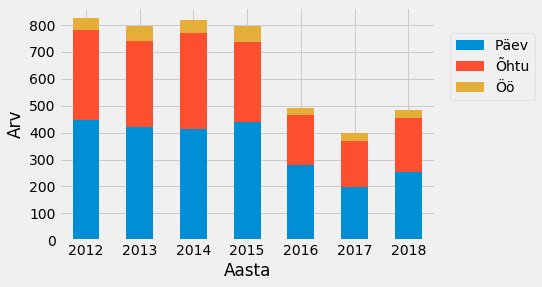

In [59]:
with plt.style.context('fivethirtyeight'): #tekstide jagunemine aastate ja p√§eva osa j√§rgi 
    df.groupby(['Aasta', 'Postituse_aeg_agr']).size().unstack().plot(kind='bar', stacked=True)
    plt.xticks(rotation='horizontal')
    plt.legend(loc=(1.04,0.6))
    plt.ylabel('Arv')

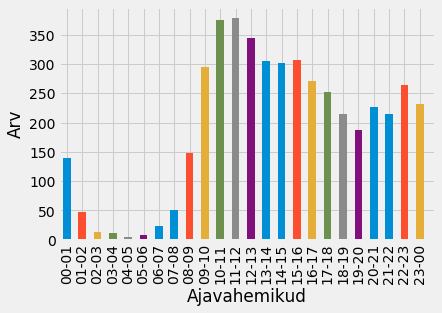

In [61]:
with plt.style.context('fivethirtyeight'): #tekstide jagunemine kirjutamise aja j√§rgi
    df['Postituse_aeg'].groupby(df['Postituse_aeg']).value_counts().plot(kind='bar')
    x =[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
    labels = ['00-01','01-02','02-03','03-04','04-05','05-06','06-07','07-08',
             '08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16',
              '16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-00'
              ]
    plt.xticks(x, labels)
    plt.xlabel('Ajavahemikud')
    plt.ylabel('Arv')

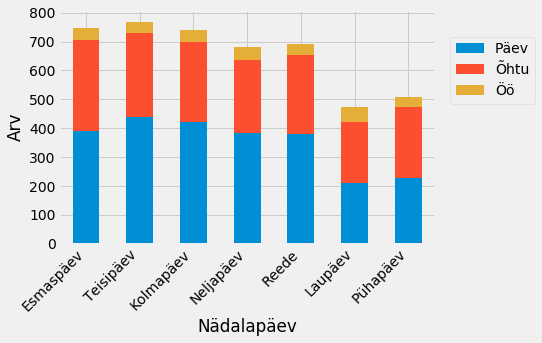

In [15]:
uus_df =df #tekstide jagunemine n√§dalap√§evade j√§rgi
uus_df['N√§dalap√§ev'] = pd.Categorical(uus_df['N√§dalap√§ev'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
with plt.style.context('fivethirtyeight'):
    uus_df.groupby(['N√§dalap√§ev', 'Postituse_aeg_agr']).size().unstack().plot(kind='bar', stacked=True)
    x =[0,1,2,3,4,5,6]
    labels = ['Esmasp√§ev','Teisip√§ev','Kolmap√§ev','Neljap√§ev','Reede',
              'Laup√§ev','P√ºhap√§ev']
    plt.xticks(x, labels,rotation=45,ha='right')
    plt.legend(loc=(1.04,0.6))
    plt.ylabel('Arv')

Sotsiaalmeedias avaldatud tekstide pikkused erinevad, s√µltudes ka keskkonna poolt pandud piirangutest. N√§iteks kuigi aastal 2019 on Twitteri s√§utsu maksimumpikkuseks 280 t√§hem√§rki, oli Sarah Perez‚Äôi andmetel  aastal 2018 ainult 5% s√§utsudest pikemad kui 190 t√§hem√§rki. Perekooli foorumist allalaaditud kasvatusv√§√§rtusi sisaldavate tekstide keskmine pikkus oli 145 s√µna (sh. tujukujud) ja mediaan 115 s√µna, keskmiselt oli √ºhes tekstis 960 t√§hem√§rki, 10,2 lauset ja √ºhes lauses oli keskmiselt 14,7 s√µna, kusjuures s√µnade arv lauses varieerus aastate jooksul v√§he. Kasvatusv√§√§rtusi sisaldavate tekstide pikkus on oluline eesk√§tt seet√µttu, et Pajupuu jt j√§rgi on vaja teksti emotsionaalsuse paremaks m√§√§ramiseks teksti, mille miinimumpikkus oleks kaks omavahel sisuliselt seotud lauset (Pajupuu jt, 2016). 

Teksti emotsionaalsus m√§√§rati 4576 tekstis (99,2%), emotsiooniskoor j√§i nulli 257 tekstis, positiivse emotsiooniskooriga tekste oli 2413 ja negatiivse emotsiooniskooriga tekste 1906. Emotsionaalsus j√§i m√§√§ramata 36 tekstis, sest seal polnud √ºhtegi emotsionaalsusega teksti√ºhikut.

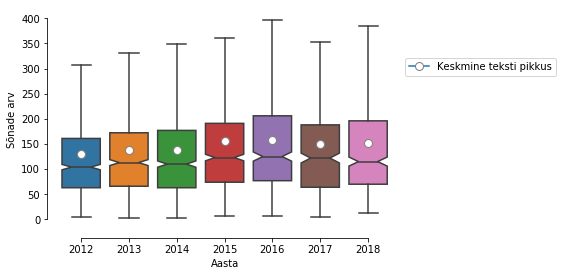

In [60]:
#boxplot t√º√ºpi joonis, n√§itab tekstide jaotust
ax=sns.boxplot(x="Aasta", y='S√µnade_arv',
               data=df,showfliers=False, showmeans=True,notch=True,
              meanprops={"marker":"o","markerfacecolor":"white",
                         "markeredgecolor":"grey", 'markersize':8})
sns.despine(offset=10, trim=True)
plt.ylabel('S√µnade arv')
ring = mlines.Line2D([], [],markeredgecolor="grey", markerfacecolor='white', marker='o',
                          markersize=8, label='Keskmine teksti pikkus')
plt.legend(handles=[ring],loc=(1.04,0.7))

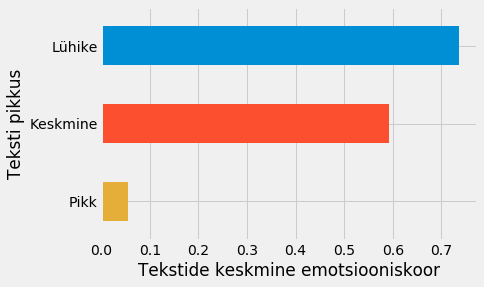

In [28]:
with plt.style.context('fivethirtyeight'):#leiame keskmise emotsiooniskoori teksti pikkuste j√§rgi
    df.groupby(teksti_pikkus) ['Emotsiooniskoor'].mean().plot(kind='barh', stacked=True)
    plt.ylabel('Teksti pikkus')
    plt.xlabel('Tekstide keskmine emotsiooniskoor')
    plt.gca().invert_yaxis()#muudame y-teljel j√§rjekorra vastupidiseks

In [837]:
#loeme kokku autonoomsed ja traditsioonilised kasvatusv√§√§rtused
autonoomia_kokku = 0
traditsioonid_kokku = 0
autonoomia_loe = Counter()
traditsioonid_loe = Counter()
kasvatusvaartused_loe = Counter()
for index, row in df.iterrows():
    kasvatusvaartus =row['Autonoomia']+row['Traditsioonilised']
    kasvatusvaartused_loe[kasvatusvaartus] +=1
    if row['Autonoomia'] >0:
        autonoomia_loe[row['Autonoomia']]+=1
        autonoomia_kokku += row['Autonoomia']
    if row['Traditsioonilised'] >0:
        traditsioonid_loe[row['Traditsioonilised']]+=1
        traditsioonid_kokku += row['Traditsioonilised']

In [847]:
#liidame andmed ja teeme tabeli
uus1=pd.Series(autonoomia_loe).to_frame('Autonoomia')
uus2= pd.Series(traditsioonid_loe).to_frame('Traditsioonilised')
#uus3= pd.Series(kasvatusvaartused_loe).to_frame('Loomingulised + traditsioonilised')
result = pd.concat([uus1, uus2], axis=1, join='outer')
result.fillna(0,inplace=True)
#result = result.append(result.agg(['sum']))#lisan rea, kus on veergude summad
result= result.astype(int)
result = result.rename_axis('Kasvatusv√§√§rtuste arv')
result_T = result.T
result_T['Kokku'] = 0 #lisame uue veeru
result_T.iloc[0,8] =autonoomia_kokku #lisame veergu andmed 
result_T.iloc[1,8] =traditsioonid_kokku
result_T = result_T.append(result_T.agg(['sum']))#lisan rea, kus on veergude summad
result_T.index = result_T.index[:-1].append(pd.Index(['Kokku']))
result_T 
result_T.style.set_table_styles(styles)#lisame tabelile stiili

In [839]:
auton_looming = 0 #loeme kokku nelja v√§√§rtusgrupi andmed
auton_saavutamine = 0
trad_konformsus = 0
trad_hea = 0
auton1_loe = Counter()
auton2_loe = Counter()
traditsioonid1_loe = Counter()
traditsioonid2_loe = Counter()
for index, row in df.iterrows():
    if row['Autonoomia_looming'] >0:
        auton1_loe[row['Autonoomia_looming']]+=1
        auton_looming += row['Autonoomia_looming']
    if row['Autonoomia_saavutamine'] >0:
        auton2_loe[row['Autonoomia_saavutamine']]+=1
        auton_saavutamine += row['Autonoomia_saavutamine']
    if row['Trad_konformsus'] >0:
        traditsioonid1_loe[row['Trad_konformsus']]+=1
        trad_konformsus +=row['Trad_konformsus']
    if row['Trad_heatahtlik_kohustumine'] >0:
        traditsioonid2_loe[row['Trad_heatahtlik_kohustumine']]+=1
        trad_hea +=row['Trad_heatahtlik_kohustumine']

In [840]:
#liidame andmed tabeliks
auton1=pd.Series(auton1_loe).to_frame('Loomingulisus')
auton2=pd.Series(auton2_loe).to_frame('Saavutamine')
trad1= pd.Series(traditsioonid1_loe).to_frame('Konformsus')
trad2= pd.Series(traditsioonid2_loe).to_frame('Heatahtlikkus/Kohustumine')
result = pd.concat([auton1,auton2,trad1,trad2], axis=1, join='outer')
result.fillna(0,inplace=True)
result= result.astype(int)
result = result.rename_axis('Kasvatusv√§√§rtuste arv')
result_T = result.T
result_T['Kokku'] = 0 #lisame uue veeru
result_T.iloc[0,8] =auton_looming #lisame veergu andmed 
result_T.iloc[1,8] =auton_saavutamine
result_T.iloc[2,8] =trad_konformsus 
result_T.iloc[3,8] =trad_hea
result_T = result_T.append(result_T.agg(['sum']))#lisan rea, kus on veergude summad
result_T.index = result_T.index[:-1].append(pd.Index(['Kokku']))
result_T 
result_T.style.set_table_styles(styles)


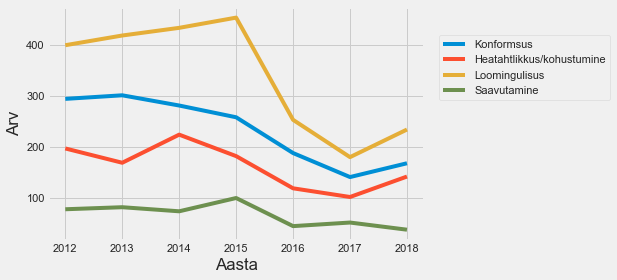

In [841]:
with plt.style.context('fivethirtyeight'):#kasvastusv√§√§rtuste arv 
    df.groupby('Aasta')['Trad_konformsus','Trad_heatahtlik_kohustumine',
                        'Autonoomia_looming','Autonoomia_saavutamine'].sum().plot(kind='line') 
    my_labels =['Konformsus','Heatahtlikkus/kohustumine',
           'Loomingulisus','Saavutamine']
    plt.xlabel('Aasta')
    plt.ylabel('Arv')
    plt.legend(loc=(1.04,0.6),labels=my_labels)  

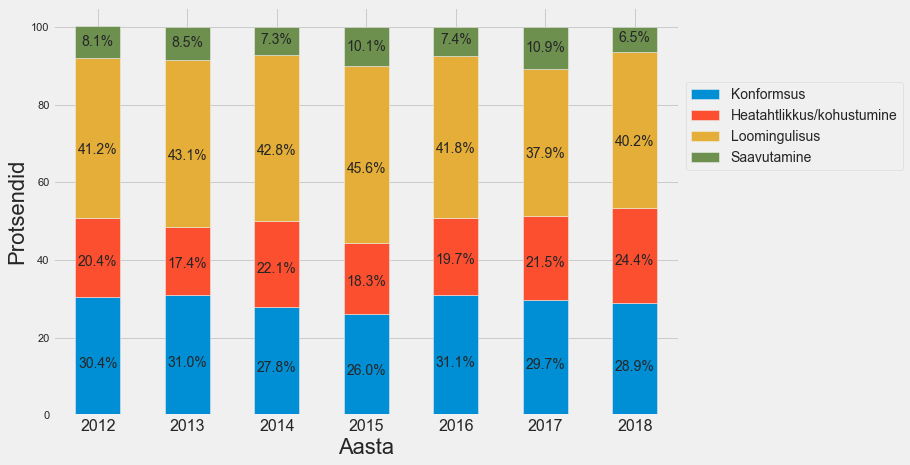

In [842]:
#kasvatusv√§√§rtuste protsentuaalne jaotumine
kokku =df.groupby('Aasta')['Trad_konformsus','Trad_heatahtlik_kohustumine',
                        'Autonoomia_looming','Autonoomia_saavutamine'].sum()
maatriks =[]
for index,row in kokku.iterrows():
    jarjend =[]
    summa =row[0]+row[1]+row[2]+row[3]    
    tulemus1 = round((row[0]/summa)*100,1)
    tulemus2 = round((row[1]/summa)*100,1)
    tulemus3 = round((row[2]/summa)*100,1)
    tulemus4 = round((row[3]/summa)*100,1)
    jarjend +=[tulemus1,tulemus2,tulemus3,tulemus4]
    maatriks +=[jarjend]
with plt.style.context('fivethirtyeight'):
    index= ['2012', '2013','2014','2015','2016','2017','2018']    
    labels =['Konformsus','Heatahtlikkus/kohustumine',
           'Loomingulisus','Saavutamine']
    tabel = pd.DataFrame.from_records(maatriks, columns=labels, index = index)
    ax = tabel.plot.bar(figsize=(10,7), stacked=True)
    for el in ax.patches:
        _x = el.get_x() + el.get_width() / 2
        _y = el.get_y() + el.get_height()*0.4
        vaartus = ('{:.1f}'.format(el.get_height()))+ str('%')
        ax.text(_x, _y, vaartus, ha="center") 
    plt.xlabel('Aasta',fontsize= 22)
    plt.ylabel('Protsendid',fontsize= 22)
    plt.xticks(rotation=0, fontsize =16)
    plt.legend(loc=(1.01,0.6),fontsize =14)

Kasvatusv√§√§rtuste v√§√§rtusgruppide ja v√§√§rtusjaotuse keskmine emotsiooniskoor
Kasvatusv√§√§rtusi anal√º√ºsiti kasvatusv√§√§rtuste keskmist emotsioonskoori aluseks v√µttes kahel viisil:
* V√§√§rtusgruppide j√§rgi - autonoomsete kasvatusv√§√§rtuste alamjaotused ‚ÄûSaavutamine‚Äú ja ‚ÄûLoomingulisus‚Äú ning traditsiooniliste kasvatusv√§√§rtuste alamjaotused ‚ÄûKonformsus‚Äú ja ‚ÄûHeatahtlikkus/kohustumine‚Äú.
* V√§√§rtusjaotuse j√§rgi - autonoomse kasvatusv√§√§rtuse leidmisel liideti kasvatusv√§√§rtuste summale number √ºks ja traditsiooniliste v√§√§rtuste leidmisel lahutati number √ºks. Kokku loodi nii viis kategooriat, kus ‚ÄûV√µrdne‚Äú t√§hendas sama arvu traditsiooniliste ja autonoomsete kasvatusv√§√§rtuste leidumist √ºhes tekstis, ‚ÄûTraditsiooniline‚Äú t√§hendas tekstis √ºhe enama traditsioonilise kasvatusv√§√§rtuse leidumist v√µrreldes autonoomsete kasvatusv√§√§rtustega, ‚ÄûTraditsiooniline 2+‚Äú t√§hendas tekstis kahe v√µi enama traditsioonilise kasvatusv√§√§rtuse leidumist v√µrreldes autonoomsete kasvatusv√§√§rtustega, ‚ÄûAutonoomne‚Äú t√§hendas tekstis √ºhe enama autonoomse kasvatusv√§√§rtuse leidumist v√µrreldes traditsiooniliste kasvatusv√§√§rtustega ja ‚ÄûAutonoomne 2+‚Äú t√§hendas tekstis kahe v√µi enama autonoomse kasvatusv√§√§rtuse leidumist v√µrreldes traditsiooniliste  kasvatusv√§√§rtustega.
Kasvatusv√§√§rtuste v√§√§rtusgruppide keskmine emotsiooniskoor arvutati erinevalt tekstide keskmisest emotsiooniskoorist, kus jagati keskmise saamiseks tekstide emotsiooniskooride summa tekstide arvuga. Autonoomsete kasvatusv√§√§rtuste alamjaotuste ‚ÄûSaavutamine‚Äú ja ‚ÄûLoomingulisus‚Äú ning traditsiooniliste kasvatusv√§√§rtuste alamjaotuse ‚ÄûKonformsus‚Äú ja ‚ÄûHeatahtlikkus/kohustumine‚Äú keskmise emotsiooniskoori arvutamiseks anti k√µigile tekstis leiduvatele erinevatele kasvatusv√§√§rtuste alamjaotustele sama emotsiooniskoori v√§√§rtus, n√§iteks kui teksti emotsiooniskoor oli -10, siis said sama v√§√§rtuse (-10) nii tekstis leiduvad ‚Äûsaavutamise‚Äú kui ka ‚Äûloomingulisuse‚Äú kasvatusv√§√§rtuste grupp ning kui mingi grupi kasvatusv√§√§rtusi oli tekstis rohkem kui √ºks, siis tulemus sellest ei muutunud. Kasvatusv√§√§rtuste keskmine emotsiooniskoor saadi kasvatusv√§√§rtuste alamjaotuse kasvatusv√§√§rtuste emotsiooniskooride summa jagamisel seda liiki kasvatusv√§√§rtusi sisaldavate tekstide arvuga.

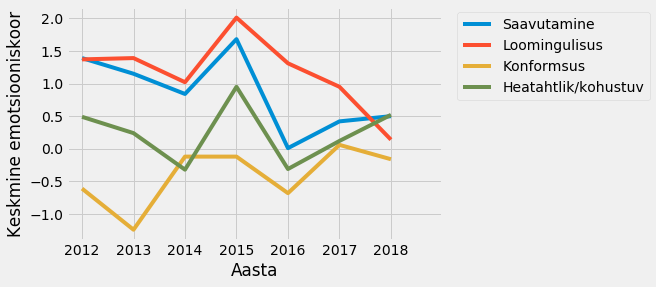

In [50]:
auton_saav_loe =Counter()#loeme andmed kasvatusv√§√§rtuste kaupa kokku
auton_loom_loe=Counter()
trad_konf_loe =Counter()
trad_kohu_loe=Counter()
auton_saav_superturbo=Counter()
auton_loom_superturbo=Counter()
trad_konf_superturbo =Counter()
trad_kohu_superturbo=Counter()
keskmine_tulemus_saav=Counter()
keskmine_tulemus_loom=Counter()
keskmine_tulemus_konf=Counter()
keskmine_tulemus_kohu=Counter()
saav_jarjend =[]
loom_jarjend =[]
konf_jarjend =[]
kohu_jarjend =[]
kasvatusvaartused_jarjend =[]
for index,row in df.iterrows():        
    if row['Autonoomia_saavutamine'] !=0:
        auton_saav_superturbo[row['Aasta']]+=1
        auton_saav_loe[row['Aasta']]+=row['Emotsiooniskoor']
    if row['Autonoomia_looming'] !=0:
        auton_loom_superturbo[row['Aasta']]+=1
        auton_loom_loe[row['Aasta']]+=row['Emotsiooniskoor']
    if row['Trad_konformsus'] !=0:
        trad_konf_superturbo[row['Aasta']]+=1
        trad_konf_loe[row['Aasta']]+=row['Emotsiooniskoor']
    if row['Trad_heatahtlik_kohustumine'] !=0:
        trad_kohu_superturbo[row['Aasta']]+=1
        trad_kohu_loe[row['Aasta']]+=row['Emotsiooniskoor']
for k,v in auton_saav_loe.items():#arvutame keskmised
    for k2,v2 in auton_saav_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)#v2
            keskmine_tulemus_saav[k]=tulemus
for k,v in auton_loom_loe.items():
    for k2,v2 in auton_loom_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)
            keskmine_tulemus_loom[k]=tulemus
for k,v in trad_konf_loe.items():
    for k2,v2 in trad_konf_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)
            keskmine_tulemus_konf[k]=tulemus
for k,v in trad_kohu_loe.items():
    for k2,v2 in trad_kohu_superturbo.items():
        if k ==k2:
            tulemus =round(v/v2,2)
            keskmine_tulemus_kohu[k]=tulemus
#j√§rjestame andmed soovitud j√§rjekorras
result_saav = sorted(keskmine_tulemus_saav.items() , key=lambda t : t[0])
result_loom = sorted(keskmine_tulemus_loom.items() , key=lambda t : t[0])
result_konf = sorted(keskmine_tulemus_konf.items() , key=lambda t : t[0])
result_kohu = sorted(keskmine_tulemus_kohu.items() , key=lambda t : t[0])

for k,v in result_saav:#paneme andmed j√§rjenditesse
    saav_jarjend +=[v]
for k,v in result_loom:
    loom_jarjend +=[v] 
for k,v in result_konf:
    konf_jarjend +=[v]
for k,v in result_kohu:
    kohu_jarjend +=[v]
kasvatusvaartused_jarjend =[saav_jarjend,loom_jarjend,konf_jarjend,kohu_jarjend]
labels= ['2012', '2013','2014','2015','2016','2017','2018']     
index =['Saavutamine','Loomingulisus', 
        'Konformsus','Heatahtlik/kohustuv']
#loome tabeli
tabel = pd.DataFrame.from_records(kasvatusvaartused_jarjend, columns=labels, index = index)
tabel.fillna(0,inplace=True)
tabel = tabel.rename_axis('Kasvatusv√§√§rtuste keskmine emotsiooniskoor')
tabel
tabel_T = tabel.T #p√∂√∂rame tabelit
tabel_T
with plt.style.context('fivethirtyeight'):#teeme joonise
    tabel_T.plot()
    x =[0,1,2,3,4,5,6,7]
    plt.xticks(x, labels)
    plt.legend(loc=(1.04,0.6))
    plt.xlabel('Aasta')
    plt.ylabel('Keskmine emotsiooniskoor')
    #plt.title ('Kasvatusv√§√§rtuste keskmine emotsiooniskoor')


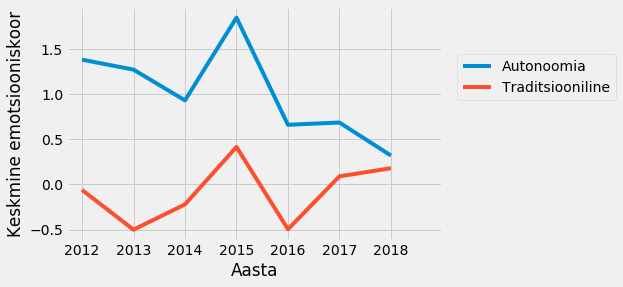

In [51]:
uus_tabel = tabel_T #kasvatusv√§√§rtuste keskmine emotsiooniskoor
uus_tabel['Autonoomia'] = (uus_tabel['Saavutamine']+uus_tabel['Loomingulisus'])/2
uus_tabel['Traditsiooniline'] = (uus_tabel['Konformsus']+uus_tabel['Heatahtlik/kohustuv'])/2
uus_tabel = uus_tabel.drop(["Saavutamine", "Loomingulisus",
                            "Konformsus","Heatahtlik/kohustuv"], axis=1)
uus_tabel
with plt.style.context('fivethirtyeight'):
    uus_tabel.plot()
    x =[0,1,2,3,4,5,6,7]
    plt.xticks(x, labels)
    plt.legend(loc=(1.04,0.6))
    plt.xlabel('Aasta')
    plt.ylabel('Keskmine emotsiooniskoor')

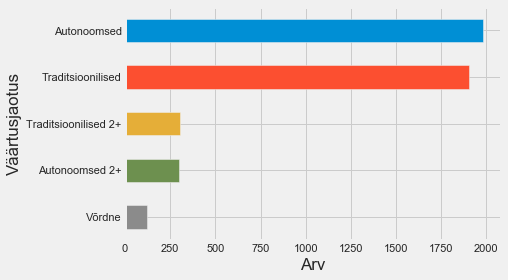

In [768]:
with plt.style.context('fivethirtyeight'):#v√§√§rtusjaotus arvuliselt
    df['V√§√§rtusjaotus'].value_counts().plot(kind='barh')
    plt.ylabel('V√§√§rtusjaotus')
    plt.xlabel('Arv')
    plt.gca().invert_yaxis()

Kasvatusv√§√§rtuste keskmise emotsiooniskoori arvutamiseks jagati v√§√§rtusjaotuses olevate tekstide emotsiooniskooride summa v√§√§rtusjaotuses olevate tekstide arvuga, n√§iteks kui v√§√§rtusjaotuses ‚ÄûV√µrdne‚Äú on 10 teksti, mille emotsiooniskooride summa on 20, siis on v√§√§rtusjaotuse keskmine emotsiooniskoor 2. 

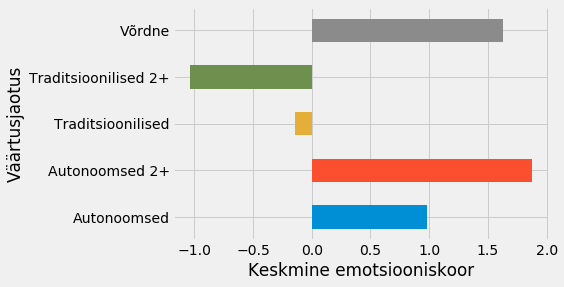

In [52]:
with plt.style.context('fivethirtyeight'):#keskmine emotsiooniskoor v√§√§rtusjaotuse j√§rgi
    df.groupby('V√§√§rtusjaotus')['Emotsiooniskoor'].mean().plot(kind='barh')
    plt.xlabel('Keskmine emotsiooniskoor')
    plt.ylabel('V√§√§rtusjaotus')

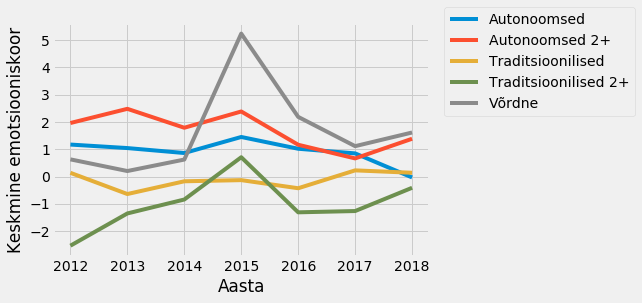

In [53]:
import matplotlib.pyplot as plt #v√§√§rtusjaotus aastate l√µikes
with plt.style.context('fivethirtyeight'):
    df.groupby(['Aasta','V√§√§rtusjaotus'])['Emotsiooniskoor'].mean().unstack().plot(kind='line')     
    plt.xlabel('Aasta')
    plt.ylabel('Keskmine emotsiooniskoor')
    #x =[0,1,2,3,4,5,6]
    #labels = ['2012','2013','2014','2015','2016','2017','2018']
    #plt.xticks(x, labels)
    #plt.title ('Keskmine emotsionaalsusskoor')
    plt.legend(loc=(1.04,0.6))

Lisaks andmete kvantitatiivsele anal√º√ºsile on sotsiaalteadlaste jaoks oluline ka tekste kvalitatiivselt anal√º√ºsida. Ainult emotsiooniskoori j√§rgi (emotsionaalsust sisaldavate teksti√ºhikute v√§√§rtuste summa)  tekste otsides tulevad valikusse pikemad tekstid, ainult tekstide keskmise emotsiooniskoori j√§rgi otsides (emotsiooniskoor jagatuna s√µnade arvuga) tulevad j√§llegi l√ºhemad tekstid, sest mida l√ºhem tekst, sest suurem on emotsioonis√µnastikus oleva s√µna (v√µi ka tujukuju v√µi emotsioonis√µnastikus mitteoleva tegus√µna) m√µju keskmisele. 

Tekstidest paremate otsingutulemuste saavutamiseks loodi kaalutud keskmine emotsiooniskoor, mis arvutatakse s√µltuvalt s√µnade arvust tekstis j√§rgmistel p√µhim√µtetel: 
* Kuni 10 s√µna tekstis ‚Äì emotsionaalsusskoor korrutatakse l√§bi arvuga 0,25; 
* Rohkem kui 10 s√µna ja v√§hem kui esimeses kvartiilis korrutatakse l√§bi arvuga 0,5; 
* S√µnade arv vahemikus esimene kvartiil (I kv) ja III kvartiil (III kv) korrutatakse √ºhega; 
* S√µnade arv suurem kui III kvartiil ja v√§iksem kui maksimum (kolmanda ja esimese kvartiili vahe ehk IQR, mis on korrutatud 1,5-ga + kolmas kvartiil) korrutatakse l√§bi arvuga 1,5: 
* Maksimumist suurem s√µnade arv korrutatakse l√§bi arvuga 2.

In [55]:
kaalutud_emotsiooniskoor =[]#kaalutud emotsiooniskoori arvutamine
esimene_kvartiil =df.S√µnade_arv.quantile(0.25)
kolmas_kvartiil=df.S√µnade_arv.quantile(0.75)
IQR = kolmas_kvartiil - esimene_kvartiil
maksimum =kolmas_kvartiil + 1.5*IQR
print(esimene_kvartiil, kolmas_kvartiil, IQR, maksimum)
for index, row in df.iterrows():
    if row['S√µnade_arv']<esimene_kvartiil and row['S√µnade_arv']>10:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*0.5
    elif row['S√µnade_arv']>kolmas_kvartiil and row['S√µnade_arv']<maksimum:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*1.5
    elif row['S√µnade_arv']>=maksimum:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*2
    elif row['S√µnade_arv']<=10:
        kaal_emo =row['Kaalutud_emotsiooniskoor']*0.25
    else:
        kaal_emo =row['Kaalutud_emotsiooniskoor']
    kaalutud_emotsiooniskoor +=[kaal_emo*100]
df['Kaalutud_emotsiooniskoor2'] = kaalutud_emotsiooniskoor 

68.0 182.0 114.0 353.0


N√§idisp√§ring nr 1. Leitakse kolm k√µige madalama emotsiooniskooriga teksti. Kui soovida leida kolm k√µige suurema emotsiooniskooriga teksti, tuleb koodis kirjutada "nsmallest" asemele "nlargest".

In [849]:
df_filter=df.nsmallest(3,'Emotsiooniskoor')
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('S√µnade arv',row['S√µnade_arv'])
            print('Kasvatusv√§√§rtusi kokku', row['Kasvatusv√§√§rtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])#leiame teisest failist teksti
            print()

S√µnade arv 586
Kasvatusv√§√§rtusi kokku 1
Kaalutud emotsionaalsusskoor -0.05204778156996587
Emotsionaalsusskoor -30.5
minu vanem poja (8a) asperger. see selgus ka kooli minnes. enne arvasin ikka, et tegu lihtsalt lapse jonnihoogudega. lasteaias oli probleeme tegevuse l√µpetamisega. koolis k√§itumine siiani olnud hea, √µppinud viitele. kui juhtumisi tulnud neli, siis peab seda halvaks hindeks. kord sai m√§rkuse ja nuttis selle p√§rast tund aega esiku p√µrandal pikali maas. aga kodus elab end v√§lja solvab, l√∂√∂b, karjub, on v√§ga ebaviisakas, on majast v√§lja jooksnud, v√µib kasv√µi keset √∂√∂d kisada. on kuri ka pisema venna vastu kui too teeb midagi keelatut, on teda ka l√∂√∂nud, samas kui hea tuju, siis m√§ngivad v√§ga ilusasti koos. vihasena trambib jalgu, peksab seinu, viimasel ajal on hakanud end l√∂√∂ma k√§ega vastu pead. v√§ga ebameeldiv situatsioon oli kord k√ºlas olles, kus ta kogemata m√§nguhoos tegi s√µbra lapsele haiget ning lukustas end siis vannituppa ja hakkas seal r√∂

S√µnade arv 616
Kasvatusv√§√§rtusi kokku 2
Kaalutud emotsionaalsusskoor -0.07386363636363637
Emotsionaalsusskoor -45.5
http://www. femme. ee/blog/mariann/√úks kiri27. Feb 2012  Kallis √µpetaja,Ma ei tea, kas Te enam m√§letategi mind.  Kasparit. Seda kriimulise n√§o ja kurbade silmadega v√§√§nikut, keda Te alal√µpmata direktori juurde saatsite v√µi p√§evikusse m√§rkusi kritseldasite. Minuga polnud lihtne. Olin rahutu ja jonnakas, liiga vali ja segav. Te nii p√º√ºdsite hoida klassis korda ja kuulekalt enda kohustusi t√§ita‚Ä¶ja mina olin √ºlbe ja egoistlik. Teie arvates. Tegelikult oli mul Teist siiralt ja s√ºdamest kahju, sest Teie √ºlip√º√ºdlikkus muutis Teid kellekski teiseks ja eemaldas Teid tegelikult meist. Aine muutus igavaks, sest Teie muutusite tavaliseks moraalij√ºngriks, kelle s√µnades puudus tegelik huvi ja soov midagi jagada. √ïpilastena p√º√ºdsime me k√§ituda v√µimalikult korralikult ja viksilt, et mahtuda meile pealesurutud raamidesse, kuid sisemuses kisendasime vabaduse j

N√§idisp√§ring 2. Leitakse kolm k√µige madalama kaalutud keskmise emotsiooniskooriga teksti.

In [850]:
df_filter=df.nsmallest(3,'Kaalutud_emotsiooniskoor2')
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('S√µnade arv',row['S√µnade_arv'])
            print('Kasvatusv√§√§rtusi kokku', row['Kasvatusv√§√§rtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])
            print()

S√µnade arv 73
Kasvatusv√§√§rtusi kokku 1
Kaalutud emotsionaalsusskoor -0.2054794520547945
Emotsionaalsusskoor -15.0
Teemaalgataja on jobu. Sul muud pole teha kui 16-aastasega kakelda ja isa ja ennast \‚Äùaustama\‚Äù panna? Loll eit oled, ei muud, ja see isa on seal kodus mingi pastel, keda sa oled l√§bi niku suutnud endale allutada. H√§bi pole teise naise meest √§ra varastada, m√µrd selline? Ma pidin naeru k√§tte √§ra surema lause \‚Äùmeie mehega hommikuti kallistame, enne kui t√∂√∂le l√§heme\‚Äù. KAS T√ïESTI on nii lamedaid paarikesi olemas????? Napakas lits, osta elu omale. 

S√µnade arv 78
Kasvatusv√§√§rtusi kokku 1
Kaalutud emotsionaalsusskoor -0.16666666666666666
Emotsionaalsusskoor -13.0
Mul 13-aastane poeg ja k√µige suuremaks probleemiks on tema hilinemine. Hommikuti kooli loivab pool tundi ja enamasti hilineb. M√µnikord ei j√µua √ºldse esimesse tundi, siis j√§lle ei j√µua kolmandase tundi v√µi hilineb √ºle 10 minuti. Kuskile minek on, siis venib nagu tatt, istub viimase minuti

N√§idisp√§ring 3. Leitakse kolm k√µige k√µrgema kaalutud keskmine emotsiooniskooriga teksti, kus sisalduksid nii konformsed kui loomingulised kasvatusv√§√§rtused. 

In [851]:
df_filter=df[(df.Trad_konformsus != 0) & (df.Autonoomia_looming !=0)].nlargest(3,'Kaalutud_emotsiooniskoor')
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('S√µnade arv',row['S√µnade_arv'])
            print('Kasvatusv√§√§rtusi kokku', row['Kasvatusv√§√§rtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])
            print()

S√µnade arv 31
Kasvatusv√§√§rtusi kokku 2
Kaalutud emotsionaalsusskoor 0.12903225806451613
Emotsionaalsusskoor 4.0
Trenn v√µi muu hobi aitab t√µesti v√§ga h√§sti. Meie laps hakkas iluv√µimlemisega tegelema ja see on talle olnud √ºlimalt positiivne igas m√µttes: andnud julgust ja enesekindlust, aga ka p√ºsivust ja enesedistsipliini.

S√µnade arv 78
Kasvatusv√§√§rtusi kokku 3
Kaalutud emotsionaalsusskoor 0.16666666666666666
Emotsionaalsusskoor 13.0
Hea ja mitmek√ºlgne haridus loob v√µimekust ja rohkem v√µimalusi eneseteostuseks. T√§htis on ju valikute v√µimalus. Eks need valikud pole kerged ja asjaolusid on erinevaid. √Ñrme √ºldista üôÇ Aga kui julgus ja enesekindlus tuginevad heale haridusele, siis pole tegemist laus√ºlbusega, vaid pigem noortele iseloomuliku tormakuse ja illusiooniga enese k√ºpsusest üôÇ Viisakus ja empaatiav√µime on hea hariduse oluline osa ja lapsi peab toetama ja innustama ka kodune keskkond ja vanemate hoiakud. Olgem s√µbralikumad ja √§rgem t√§iskasvanutena harju

N√§idisp√§ring 4. Leitakse kolm k√µige madalama kaalutud keskmise emotsiooniskooriga teksti, kus sisalduksid nii konformsed kui loomingulised kasvatusv√§√§rtused. 

In [852]:
df_filter=df[(df.Trad_konformsus != 0) & (df.Autonoomia_looming !=0)].nsmallest(3,'Kaalutud_emotsiooniskoor')#['Names']
for rida in puhas_jarjend2:
    for index,row in df_filter.iterrows():
        if rida[0]==row[0]:
            print('S√µnade arv',row['S√µnade_arv'])
            print('Kasvatusv√§√§rtusi kokku', row['Kasvatusv√§√§rtusi'])
            print('Kaalutud emotsionaalsusskoor',row['Kaalutud_emotsiooniskoor'])
            print('Emotsionaalsusskoor', row['Emotsiooniskoor'])
            print(rida[5])
            print()

S√µnade arv 27
Kasvatusv√§√§rtusi kokku 2
Kaalutud emotsionaalsusskoor -0.07407407407407407
Emotsionaalsusskoor -2.0
Kui laps ei allu tunni distsipliinile ja pidevalt teeb √µpetajale asjakohatuid m√§rkusi, segab vahele jne, siis see ei peegelda mitte √µpilase m√µtlemisv√µimet ja iseseisvust, vaid ainult kasvatamatust.

S√µnade arv 134
Kasvatusv√§√§rtusi kokku 2
Kaalutud emotsionaalsusskoor -0.0708955223880597
Emotsionaalsusskoor -9.5
Minu kogemus √ºtleb, et √µpetaja ei karju ilmaasjata. √útled, et ta k√µrgendab h√§√§lt, kui keegi ei saa aru. Aga kuidas see mitte-arusaamine v√§lja n√§eb? V√µibolla laps (mitte tingimata teemaalgataja oma) pahatahtlikult \‚Äùei saa aru\‚Äù? Lollitab ja tegeleb muude asjadega tunnis, ei p√º√ºagi aru saada jne. Oma koolajast m√§letan selliseid lapsi k√ºll. Ja praegu on lapsed palju hullemad, distsipliini pole ollagi, kodune kasvatus on olematu‚Ä¶ Minu p√µhikooli matemaatika√µpetaja, kes oli √ºhtlasi ka klassijuhataja, karjus meie peale iga p√§ev v√§hemalt 1